<a href="https://colab.research.google.com/github/radarfundamentals/radar_course/blob/master/RadarNotebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 Radar Fundamentals


<a id='Radar'></a>

[Radar](https://en.wikipedia.org/wiki/Radar) is an acronym for Radio Detection and Ranging. Therefore, the fundamental goal of any radar, is to measure the Range of a distant object using the two-way propogation of electromagnetic (EM)waves (in the radio and microwave spectrum).

This section will discuss the fundamental operation of a radar system from  [first principles](https://en.wikipedia.org/wiki/First_principle), leading you through the thought patterns of a radar engineer.

We will introduce each concept, which you will use in your notebook to calculate elementary design parameters for each relavent example in series of exercises. 

Throughout the lectures and discussions, we advise that you include your own notes to flesh-out the details. The original form of this document purposefully skimps on details to target the overarching concepts, rather than the nitty-gritty theory.

## 2.1 A Simple Pulse Doppler Range Measurement

### Pulse-Doppler Radar


![A Pulse Doppler Radar](https://upload.wikimedia.org/wikipedia/commons/0/07/Radarops.gif)


When it comes to learning the radar concept for the first time, Pulse-Doppler radars are likely the easiest to understand. They allow us to determine the range to a target by determining the flight time of radio pulses, and provide us the ability to determine the target’s velocity using the Doppler effect. 
 
Whilst there are several other types of radar architectures, we’ll limit ourselves to Pulse-Doppler in this course. Once you have the fundamental understanding of these systems, you will be able to better understand the operation of any radar system. 
Range measurement using a Single Pulse

Below is an image from Principles of Modern Radar [1], that shows a typical Radar system. For now, we’ll avoid much of the detailed segments of this image, and focus on transmission and reception as general concepts. 







As an example, let's calculate (using Python) the range of a ship if we record a 'large' voltage signal at a relative time of $20 \mu s$ after transmission:

In [0]:
time_recorded = 20e-6 # Python supports scientific notation. eg. 5e5 = 5 x 10^5
c = 3e8
range_to_ship = c*time_recorded/2 

print('Range to ship: ' + str(range_to_ship) + ' m')

Range to ship: 3000.0000000000005 m


You may notice that the above code prints quite a few significant figures due to the division. We can make reduce the number of figures by rounding using $//$ division. The result is then further divided by 1000 to convert metres to kilometres.

In [0]:
range_to_ship = c*time_recorded//2
print('Range to ship: ' + str(range_to_ship/1000) + ' km')

Range to ship: 3.0 km


### Range measurement using a Single Pulse

Below is an image from Principles of Modern Radar [1], that shows a typical Radar system. For now, we’ll avoid much of the detailed segments of this image, and focus on transmission and reception as general concepts. 

![alt text](https://github.com/radarfundamentals/radar_course/blob/master/jupyter_images/pomr_scene.PNG?raw=true)

In a Pulse-Doppler radar, an electromagnetic (EM) pulse, of some pulse width , RF carrier frequency, , and power is created. This pulse is transmitted into the environment using an antenna. The pulse interacts with certain conductive materials that cause the power to be reflected back into the environment. A tiny fraction of the reflected power makes its way back to the radar’s receiving antenna, where it is amplified, shifted to an appropriate intermediate frequency (IF), and recorded. The recording is simply the received pulse voltage/power, which is sampled by a fast analog to digital converter (ADC).

![alt text](https://github.com/radarfundamentals/radar_course/blob/master/jupyter_images/pulsedoppradar.png?raw=true)

The range to a target can be calculated by measuring the relative time difference - i.e the difference in time between transmission and reception - of the pulse to and from the target. This works, because the speed of light, c, travels at 299 792 458 m/s, or approximately . The Range is therefore just a function of time:

$R(t) = \frac{ct}{2} \quad [m]$

The 2 in this function is due to the fact that there is a two-way propagation of the pulse, so the range is half the amount of time recorded.


### Exercise

Draw some simple range / time plots (what you would see on an oscilloscope) and discuss the following situations:

1. 1 us pulse, target range 2 km. Again, target range 100 m. Problem?
2. Same radar. Now 100 us pulse. Problems in seeing targets?
3. Same radar as (2), two targets at 15 km and 16 km. 
4. Now with the targets at 30 and 40 km?
5. Calculate the time to a target 100 km away using the true speed of light (299 792 458 m/s), and the approximated value (300 000 000 m/s). What is the error in seconds between them? What does this error represent as a range error?

Hint: Remember the two-way path!



## 2.2 Range Resolution

### Animation



Animations from: [Radar Tutorial](https://www.radartutorial.eu/01.basics/Range%20Resolution.en.html)

![RangeRes1](https://www.radartutorial.eu/01.basics/pic/ra3-100m.big.gif)

![RangeRes2](https://www.radartutorial.eu/01.basics/pic/ra2-200m.big.gif)

### Range Resolution

As you can see by the previous exercises, if two targets are spaced too closely together, their pulses overlap, meaning it's very difficult to separate or *resolve* each target.

The radar's range resolution is therefore the minimum distance required between two targets fully resolve them. 

The range resolution, $\Delta R$, is therefore a function of the pulse-width $\tau$.

$\Delta R(\tau) = \frac{c\tau}{2}$

We can see that if the length of the pulse is longer, the radar's range resolution is higher. The required range resolution depends on the radar and what sort of targets are expected.  


### Pulse Energy and choice of $\tau$

For a target to be observed, the amount of energy returned to the reciever has to be above some threshold level, which is typically the noise floor of the radar (more on this later). 

The pulse energy for a single pulse, is effectively the transmitted Power, maintained for the length of the transmission, the pulse-width, $\tau$. All transmitters are only able to amplify the output power to some maximum value before the signal is distorted, or the transmitter is damaged. 

Therefore if a lower power is available, in order to detect further targets, the pulse-length needs to be longer. This places a limit on how short the pulse can be, as we would require a large peak power (which may damage the transmitter) to improve our range resolution.

### Improving Range Resolution

It appears that we cannot improve range resolution without reducing the maximum detection range, given some constraining power budget.

For reasons outside of the scope of this course, the range resolution actually depends on the *bandwidth*, $B$, of the pulse, which has an inverse relationship to the pulse-width.

$B = \frac{1}{\tau}$

The Bandwidth of a pulse is essentially the spectral content of the pulse. In simplistic terms, this is basically the number of sine waves that went into producing the pulse. A fast/short pulse in the time-domain is inherently very broad in bandwidth (spectral content), as it takes a huge number of sinusoids to make a fast transition. 

![Bandwidth vs Pulse Width](https://raw.githubusercontent.com/UsernameUsurper/Radar-Course-Notebook/master/ImagesJupyter/pulsewidthvsbandwidth.PNG)

Using Bandwidth rather than the pulse width, we can define range resolution as:

$\Delta R(B) = \frac{c}{2B}$

If we can find a way of increasing the bandwidth of the pulse, whilst keeping the pulse long for energy requirements, we can improve range resolution.

In practice this is done, and it is called *Pulse Compression*. The inner-workings of Pulse compression is out of the scope of this lecture, but we'll come back to it in a later lecture.

### Exercise
Determine the minimum required range resolution, and corresponding pulse-widths and bandwidth for:

1. Two targets, located at 15km and 16km.
2. Three targets, located at 1km, 8km and 11km.

Discuss the results.

## 2.3 Multiple Pulses
Now that we’ve understood the fundamental operation of a single pulse in a radar system. We’ll turn our attention to a more likely scenario, a radar that continuously transmits pulses. From this, not only do we get range for one pulse, we get range over operating time. 

How often we send a pulse is known as the pulse repetition frequency or more commonly just described by its acronym, PRF. The PRF is an important concept that directly determines several design choices of the radar, such as how far we can reliably record in range and the fastest target we can feasibly record with accuracy.

The inverse of the PRF, the Pulse Repetition interval, or PRI, gives us the time between each pulse.



### Slow / quick time presentation

Considering that we can only resolve targets to within our range resolution, we can treat each recorded range sample as single point, or range bin, and display each successive pulse in a range-time matrix as follows:

![alt text](https://github.com/radarfundamentals/radar_course/blob/master/jupyter_images/fastslowtime_matrix.png?raw=true)

The received pulses are arranged into their ‘fast-time vs. slow-time’ representation. Where fast-time represents the sampled range up to some maximum range-bin M, and ‘slow-time’ represents the number of pulses being processed, N. The pulses in fast time are spaced by the sampling speed of the radar, which typically aligns with the range resolution, which is the compressed pulse width.


### Range Ambiguities

So let’s think of a hypothetical situation where the PRF is set to 10 kHz, and a large target is 20 km away from the radar. 

![alt text](https://github.com/radarfundamentals/radar_course/blob/master/jupyter_images/range_ambiguity.png?raw=true)

By the time the first pulse to the target has arrived back at the radar, we’ve already started to record the next pulse. It therefore appears that the target is at a much closer range that it actually is!

This is known as Range Ambiguity, and it causes distant targets to appear at the closer range bins. We therefore need to design the radar as to limit any ambiguity. We can therefore calculate the maximum unambiguous range, $R_{ub}$, given a PRF. Maximum unambiguous range is defined as:

$R_{ub} = \frac{c}{2PRF}$

This unambiguous range gets longer for slower PRFs. However, slower PRFs cause their own issues in how well we can measure the velocity of the target, which we will see at a later stage.

There are methods to handle ambiguous targets, but we will not discuss those in this course. 

### Exercise

1. What do you think some reasonable PRFs for real radars?
2. What is the unambigous range for a radars with the following PRFs a) 100 Hz, b) 1 kHz, c) 10 000 kHz?



## 2.4 Understanding Decibels, or dB's (dee-bees)
The Decibel, dB, notation used by radar engineers can be quite bewildering if you’ve never come across it before. So, it’s a good idea to spend some time to discuss it, and get more acquainted with using dB’s in practice.

### Why use the dB notation?

A dB, is merely a way of representing a ratio. It has a few useful properties that are particularly powerful for simple calculations, and visualising data. Simply stated, a dB is defined as:

$dB = 10 \log_{10}\frac{B}{A}$

Where A is the input, be it an amplifier, attenuator, or reference value, and B is the output. Note that the logarithm is base 10.

For example. An amplifier’s goal is to give gain to an input signal, which simply means that the level (typically Voltage or Power) of the signal is increased with respect to the input by some ratio. If the gain is 2, it means that the voltage is doubled, which is a 2:1 ratio. In dB’s a doubling of any quantity represents a gain of 3 dB. Try the calculation out yourself.

Likewise, if a signal is attenuated, the output signal level decreases with respect to the input, resulting in signal loss. A halving of the signal is represented as -3dB. Note that it’s common practice to say “the signal was attenuated by 10 dB”, rather than explicitly stating the negative symbol. Be aware of this, because a positive value indicates signal gain, and will ruin your calculation. Positive = Gain, Negative = Loss/Attenuation.

Quick question? What is a linear gain of 1 (known as unity gain), in dB?

To convert back to a linear ratio S, 

$S = 10^{\frac{dB}{10}}$

### Exercise

Convert a gain of 10 to dB
Convert an attenuation of 1000 to dB
Convert a gain of 2 000 000 to dB

Plot these three values on a linear graph, and separately on a dB graph.

Convert 23 dB to a linear scale
Convert 50 dB to a linear scale

An amplifier has a voltage gain of 20 dB. What is the Power gain of this amplifier in dB for a 50 ohm system?


### Power, Antenna Gain and Relative quantities in dB

Conversion to dB’s is also typically the standard measure for powers, amongst several other uses. The ‘ratio’ in this regard, is with respect to some absolute linear unit, such as the Watt. The nomenclature in this case, usually places a letter after the dB, to inform you what the base unit is. For instance, 3 dBW represents 2 W of electrical power. However, in practice, 1 W or 1 dBW is quite a large amount of power, when we consider that the receiver sees powers in the nanowatt regime. A more conventional unit is the dBm, which is based on the milliwatt.  

To convert from dBW to dBm, simply add 30. Example, 10dBW = 10+30 = 40 dBm.

Other dB scales are also typically used such as dBi for antenna gain, which represents the gain of an antenna over an isotropic antenna (we’ll talk about antenna gain in the next section), or the dBc, which is a power relative to the Carrier.

Also keep in mind, that the dBW is often just written as dB, which may get confusing. Always check the context!


### Exercise

1. Convert 2kW to dBW and dBm
2. A signal is 50 000 times smaller than the carrier. How many dBc’s smaller is the signal?


### Why use the dB’s?

dB’s are incredibly useful for quickly calculating the signal level in cascaded chains of components, where there are gains and losses. A radar system is essentially composed of cascaded elements, which we’ll see in the Hardware section. For instance, let’s suppose the following cascaded system:

![alt text](https://github.com/radarfundamentals/radar_course/blob/master/jupyter_images/db_cascade.png?raw=true)

Without dBs, we would need to convert and multiply the input power and every gain/loss together on a linear scale. With dB’s it’s as simple as adding! 

$$P_{out} = P_{in}+A+B+C+D = 30+10+(−5)+(−6)+4 = 33 dB$$

Additionally, using the dB scale allows us to graphically represent values of vastly different proportions. This is particularly helpful, when we consider that a radar may have a 1kW transmitter, but a receiver that measures nanowatts, or 1000 vs 0.000 000 001 (15 orders of magnitude). Below are 2 plots that show this discrepancy.

In a standard linear scale, it’s difficult to plot values of vastly different sizes on the same graph. dB based scales, simplify this issue, where every 10 dB difference is 10 times larger. 



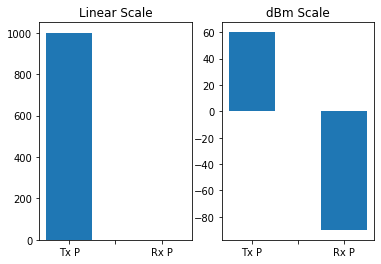

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt # We import 2 useful packages. Matplotlib will allow us to plot data
import numpy as np # Numpy gives us computational functions 

transmit_power_linear = 1e3
receive_power_linear = 1e-12

transmit_power_dBm = 10*np.log10(transmit_power_linear) + 30
receive_power_dBm = 10*np.log10(receive_power_linear) + 30

f, (ax1, ax2) = plt.subplots(1, 2)
labels = ['','Tx P','','Rx P']
x = np.arange(2)
width = 0.5
ax1.bar(x, [transmit_power_linear,receive_power_linear],width,align='center')
ax1.set_xticklabels(labels)
ax1.set_title('Linear Scale')
ax2.bar(x, [transmit_power_dBm,receive_power_dBm],width,align='center')
ax2.set_xticklabels(labels)
ax2.set_title('dBm Scale')
plt.show();


## 2.5​ The Radar Range Equation

Now that we have a basic understanding on sending a single, or multiple pulses, to measure the range to a target, we can try to determine how far we can actually measure some target of a given ‘size’. 

Whilst different radars are built for unique applications, the radar’s achievable range should be a fundamental design parameter of any radar. How far can you detect an incoming missile, or what is the maximum vehicle separation in autonomous radar? It’s so important, that the formula for it is simply known as the Radar Range Equation. Anyone diving into radar should derive it from first principles, so that its meaning can be fully understood.


Isotropic Radiator

Let’s start with the simplest case of an isotropic antenna. The term Isotropic means ‘ having a physical property which has the same value when measured in different directions’, which in the case of radar, means that the transmitted power is the same at all equal distances, in all directions as shown by the green sphere in the figure below (image credit: https://www.wikiwand.com/en/Effective_radiated_power). 

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/Effective_isotropic_radiated_power_illustration.svg/700px-Effective_isotropic_radiated_power_illustration.svg.png)

Now, because energy cannot be created or destroyed, and is being radiated away equally in all directions, the signal power in some volume of space, must decrease the further the volume is away from the transmitter, so that the total transmitted power at that distance is conserved. 

Due to the spherical nature of the radiation, the decrease in power happens with a ratio of $R^2$, where R is the distance from the transmitter. We can therefore determine what Power, $P_{orx}$, some $1m^2$ object of at Range of R will intersect, given a certain amount of Isotropically transmitted power, $P_{tx}$.

$$P_{orx} = \frac{P_{tx}}{4\pi R^2} \quad (1)$$




### Radar Cross Section (RCS)

However, a target at some range R, is unlikely to have an exact cross section of $1m^2$. In fact, the idea of a purely geometric area isn’t really true in Radar. Rather, objects have what is known as a Radar Cross Section (RCS), which is a measure of how much EM radiation they will reflect for a given Radio frequency, and how the radiating body interacts with the EM. There is a lot to unwrap with RCS, so for now we will just give it the symbol $\sigma$ and note that it is also measured in $m^2$. 

The amount of power found in $1m^2$ patch of the isotropic sphere at R from the object, is then the total power $P_{orx}$ retransmitted by the object with an RCS of $\sigma$. Again, the power radiated falls off with an $R^2$ dependence.

$$P_{rx} = \frac{P_{orx}\sigma}{4\pi R^2} \quad (2)$$

We can then calculate the amount of power  that would exist in a $1m^2$ area at R, after reflection by substituting equation (2) in (1).

$$P_{rxi} = \frac{P_{tx}\sigma}{(4\pi )^2 R^4} \quad (3)$$

The actual amount of power intercepted by the radar $P_{rx}$, depends on how much reradiated power it can capture, which is a measure of its effective Area, $A_e$. The total power received by the radar is then the power $P_{rxi}$ per unit area multiplied by $A_e$, or:

$$P_{rx} =  \frac{P_{tx}\sigma A_e}{(4\pi)^2 R^4} \quad (4)$$


### ​ Antenna gain over Isotropic

As can be seen from the radiation pattern above, isotropic antennas would send useful power into every possible direction, whereas our radar is typically designed to illuminate only a small segment of this distribution. We therefore do not actually use isotropic antennas, but rather design antennas that  ‘compress’ the power from the unwanted directions into a direction we want. This compression is called antenna Gain, G, and assists in boosting the power transmitted or received by the antenna.

The radiation pattern now changes from a sphere, to a pattern that assists the radar’s goal. Radar radiation patterns are diverse, but are mostly classified into 2 types: broad beams or narrow pencil-beams. Typical antennas used in Radars have gains between 20-40 dBi. 

The effective Area $A_e$ that the radar intersects also depends on the receiving Antenna’s gain and operating wavelength. Thus, $A_e$ can be expressed by the gain of the antenna, which is typically the same as the transmitter.

$$A_e = \frac{G\lambda^2}{4\pi} \quad (5)$$

Note that the wavelength of EM waves is inversely proportional to the carrier frequency, $f_c$:

$$f_c = \frac{c}{\lambda}$$


### Radar Equation for Power

We now have enough to calculate one of the most basic forms of the Radar Range equation. Substituting (5) into (4) and including the transmitting antenna gain, 

$$P_{rx}(R) =  \frac{P_{tx}G_{tx}G_{rx} \sigma \lambda ^2}{(4\pi)^3 R^4} \quad (6)$$

The Transmitter gain and receiver gain are typically the same, so we can lump them together as $G^2$. To determine the Range, we would get for some received power, just flip the range to the other side,

$$R(P_{rx}) = \left[ {\frac{P_{tx} G^2 \sigma \lambda ^2}{(4\pi)^3 P_{rx}}}\right] ^{1/4} \quad (7)$$


## 2.6 Enhancing the Radar Range Equation


### Noise and SNR in Radar

A better use of the Radar Range Equation, is to calculate what the maximum range we can actually record is, for some given target RCS using our available hardware. We are in control of a few parameters, namely the transmitting power, $P_{tx}$, the antenna Gain, G, and the minimum signal  power $P_{rx min} = S_{min}$ that our receiver can measure to determine a detection. But what is the minimum power that we can actually measure?

In reality, the voltage seen by your receiver is not just the target, but a combination of the target power and noise. Noise is any random, and unwanted voltage fluctuation that is not a target. If we want to be fairly certain that we are not confusing our target with noise, our received power has to be several dB’s above the noise. This is known as the signal-to-noise ratio, or SNR. And is defined by the ratio of signal power to noise power, where the noise Power $N_0$, depends on the bandwidth, B and temperature, T of the receiver,

$$N_0 = k_bT_sB \quad (8)$$

Where,  is the Boltzmann’s constant ($1.38\times 10^{−23} [J/K]$), $T_s$ is the system temperature in Kelvin [K], and B is the bandwidth of the system in Hertz [Hz], which is typically our compressed pulse bandwidth. 

Note that you’ll often hear of a parameter called noise Figure, or $F$, which is a parameter that specifies how much noise our entire radar contributes. In this case, the system Temperature can be represented as the standard temperature, $T_0$ (290 K) multiplied by the noise figure:

$$T_s=FT_0$$

The SNR is then,

$$SNR = \frac{S_{min}}{N_0} \quad (9)$$

We can then determine an appropriate SNR for our radar given a certain receiver. We can also determine the maximum range that any given SNR can achieve. Substituting the SNR equation (9) into our Power Range equation for the minimum signal Power $S_{min}$ (6).

$$SNR = \frac{P_{tx} G^2 \sigma \lambda ^2}{(4\pi)^3 R^4 k_B T_s B} (10)$$

### System Losses

Unfortunately, Radars are not perfect systems, and are subjected to power losses throughout the system, processing chain, and the environment the radar acts in. For instance, the cables that connect the radar to the antenna are placed at some physical distance from the transmitter/receiver, which means that even within the small distance the signal must travel to reach the antenna, the signal power undergoes attenuation. Additional losses come in many forms, such as errors in the beam shapes, receiver straddling loss, atmospheric losses, and signal processing losses.

These losses can be lumped together in our radar range equation as a total loss, $L_t$, which is typically several dB’s large.


### Gains

If the losses were to dominate our radar, the Range of our radar would be highly impaired. Luckily, we can improve the range of our radar with system and processing gain. In particular, processing gain is a simple way of improving detection performance past the limitations of the radar’s hardware.

The simplest processing scheme is to merely add several consecutive pulses together, coherently or non-coherently. When we reach the section on Doppler processing we’ll comment more on what we mean by coherent processing. For now, the net effect is that the received power can be improved by summing $N_p$ pulses together.

Finally, the total Radar Range equation in terms of the SNR as a function of range, with loss and gain, and a system noise figure can be represented as:

$$SNR(R) =  \frac{P_{tx} G^2 \sigma \lambda ^2 N_p}{(4\pi)^3 R^4 k_B T_0 F B L} \quad(11)$$ 

Note that one can also write any form of the radar range equation in terms of dB’s. Just remember to first convert all of the values to dB’s!

$$SNR [dB] = 10log(P) + 2G +  10log(\sigma) + 20log(\lambda) + 10log(N_p) − (33) − 40log(R) − (−204) − F −10log(B) − L$$

Here, all the top values add, whilst those in the denominator subtract. Note that the 33 is from converting $(4\pi)^3$ to decibels, and the $−204$ is a conversion of the standard 290 K temperature multiplied by the Boltzmann constant, in decibels. Also note, that some values are often given in dB from the start, such as the antenna gain and noise figure.


Exercise

Why would you want a fan beam?
Why would a radar want a pencil beam?

For the Following questions, assume the following radar:



*   $P_{tx}$, 1 kW
*   $f_{c}$, 10 GHz


*   $B$, 10 MHz
  
*  $R_{target}$, 10 km
* $\sigma_{target}$, $1m^2$ 
* $G_{tx}=G_{rx}$, 10 dBi
* $L$, 5 dB
* $F$, 5 dB


1. Calculate the Power intercepted by the target.
2. Calculate the radar’s received Power for a single pulse (ignore noise power). 
3. Compare the question 1 and 2’s power. How much smaller is question 2?
4. Calculate the radar’s SNR for a coherent processing gain of 15 dB.



2.7 Target Detection in Noise

Whilst the goals of radars differ, one common goal is to detect targets, and inform the user of their presence, and their current parameters (range, speed, heading etc). Detection is the first step in many radar processors, and can essentially be boiled down to the statement, ‘is there, or isn’t there a target?’. On the surface this seems simple, considering that you are looking for a ‘voltage spike’ in your recorded data. In reality, this can be quite challenging due to the presence of noise.

A side effect of noise is that, completely random signals will enter our receiver, and appear to be targets if we have no definition of what contributes as ‘a target’. The simplest way to discern between signal and noise, is to place a threshold value in our processing stage. The threshold essentially makes a binary decision that there is a target if the received power is above the threshold, and that we may ignore any value below this threshold. Take a look at the figure below that demonstrates this idea [1]. Choosing an optimal value for this threshold is not simple, and has to do with the probability that we make a true detection, $P_D$, and the probability that there is a false alarm, $P_{FA}$, meaning that we detect noise as a target.

![alt text](https://github.com/radarfundamentals/radar_course/blob/master/jupyter_images/threshold.PNG?raw=true)


### Exercise

1. How can I reduce the number of times the noise crosses the threshold?
2. What effect will this have?


## 2.7 Doppler and Phase Measurements
[Doppler Phenomenon](https://en.wikipedia.org/wiki/Doppler_effect)

![alt text](https://upload.wikimedia.org/wikipedia/commons/c/c9/Dopplereffectsourcemovingrightatmach0.7.gif)

Image from Wikipedia under Open use policy

[Doppler in Radar](https://en.wikipedia.org/wiki/Doppler_radar)



You've likely heard the term Doppler in popular science, and may have come across it in any past physics classes. In short, a Doppler frequency is an *apparent* frequency that occurs when either the transmitter or target is moving. What this means, is that if we know the frequency we are trying to measure, but measure a higher or lower frequency, there appears to have been a shift to our transmitted frequency. The Doppler frequency (in the radar sense), is a shift in frequency that appears as the beat freqency between the transmitted (carrier) and received waveforms, 

$$f_D = f_{c}-f_r = 2v\frac{f_c}{c-v}$$

However, most targets (or radars) move at a *tiny* fraction of the speed of light! So for most practical purposes, we neglect the velocity in the demoninator. So the radar Doppler equation is:

$$f_D \approx 2v\frac{f_c}{c} = \frac{2v}{\lambda}$$

Note that the Doppler frequency is in the radial direction of the radar. That is, we can only measure the velocity towards us! If the target is moving away from the radar, the target gets a negative value, so the Doppler is negative.




###Simple Time varying Sinusoid in time and range.
An Electromagnetic wave is modelled as a sinusoidal electric field of amplitude $E_0$.

Looking at the time variation only:

$E(t) = E_0 \sin (2 \pi f_c t)$

$f_c$ is the carrier frequency, often in [GHz].


or

$E(t) = E_0 \sin (\omega_c t)$

$\omega_c$ is the "radian frequency"


At right angles to this electric field is a magnetic field. In this simplified approach we will ignore the magnetic field.

![polwave](https://upload.wikimedia.org/wikipedia/commons/0/0a/Electromagnetic_wave.png)

By <a href="//commons.wikimedia.org/wiki/User:Cepheiden" title="User:Cepheiden">Cepheiden</a> - <span class="int-own-work" lang="en">Own work</span>, Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=11771570">Link</a>

A propagating EM wave also varies sinusoidally in the direction of propagation according to its wavelength i.e. 

$E(t, r) = \frac{E_0}{r} sin (\omega t - k r)$

$r = $range, and assume the level drops inversely with distance (which is true, since power drops with range squared as we saw in radar equation).

$\omega = 2 \pi f_c$

$k = \frac{2 \pi}{\lambda}$

The physics of propagation requires:

$\lambda = \frac{c}{f_c}$




### Measuring Phase
Let us think of the instantaneous phase (the arguement of the sine functions above) as being a vector that rotates around an origin. Into the paper is time or distance, and the other two axes we will call I and Q.

![alt text](http://drive.google.com/uc?id=1BkFgSW0z064AKy3i2j4MmGA4UCSiwJ7N)

We will call $\theta = \omega t - k r$ the "instantaneous phase" of the EM wave. The phase increases linearly with time and distance along the propagation path. At a fixed distance, the phasor will rotate around the origin at the carrier frequency (very rapidly as we are dealing with a micrwave [GHz] carrier.

A radar instrument is designed to measure the I and Q values (see the hardware section), by comparing the returned values to a reference used to create the transmitted waveform.

First thing to note is that the signal has to go to the target and back, so there is always a factor of 2 we must remember. Secondly, the wave travelling at the speed of light hardly "sees" any motion of a target during interaction of the pulse: we call this the, "stop-go" assumption. A more thorough analysis shows there is phase changing during the pulse, the Lorenz transform, part of special relativity.

To measure the power of the signal:

$P_r = I^2 + Q^2$

(There are, of course scaling factors that are derived in calibration.)

The phase angle is:

$\theta = \tan^{-1}( I/Q)$

The next snag is that as the phase rotates through a value of $2 \pi$ it resets i.e. "wraps".


### Measuring Doppler in Radar Using the Slow Time Dimension

If you have never dealt with complex numbers in the past, and the above was confusing, don’t stress! In short, what we get out of the radar’s ADC is a sample that has some magnitude, A, (which is related to the received power) and phase. If the target is stationary, the phase value remains the same, whereas if the target is moving, the recorded phase will increase or decrease at a rate that is related to the Doppler frequency.

If we take the slow-time samples of a range bin, where we have detected a target, we can determine the Doppler shift by calculating how fast the phase of the recorded samples changes. 

In modern systems this is done by computing the Fourier Transform of the range bin for a selected number of slow-time samples. Essentially, this is equivalent to computing the Fast Fourier Transform (FFT) for N samples. Because we know that every sample is generated at a rate equal to the PRF, our FFT is normalised to Hz using the PRF as a sampling frequency.


### Doppler Ambiguity


Like Range ambiguities, we will also have Doppler ambiguities. Doppler ambiguities occur when the rate that we sample our signal in slow-time, the PRF, is too slow. In signal processing, sampling something too slowly is is known as *aliasing*. 

The ambiguous velocity appears within our Doppler plot as a slower target, or potenially even a target moving the wrong direction!.

Avoiding velocity ambiguity requires us to increase the PRF. Due to the aliasing effect, we can only unambigously discern Doppler shifts from -PRF/2 to PRF/2.

$$PRF > |f_D|/2$$

Note the absolute value is used as the target velocity is a vector with direction denoted by the sign of the velocity.

### Exercise

1. What is the major issue with increasing the PRF to avoid Doppler ambiguity
2. Calculate the Doppler shift for the following:


*   A target moving at 10 m/s for a 1 GHz radar
*   A target moving at 10 m/s for a 10 GHz radar
*   A target moving at 1000 m/s for a 1 GHz radar
*   A target moving at 1000 m/s for a 10 GHz radar

3. What are the unambiguous velocities for these Doppler shifts?


